# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Muhammad Khalish]
- **Email:** [khalish.21muhammad07@gmail.com]
- **ID Dicoding:** https://www.dicoding.com/users/imkhlst/

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat polusi kendaraan dari tahun 2013 hingga 2017 dari semua stasiun?
- Apa yang paling mempengaruhi kualitas udara dalam rentang waktu tersebut?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [ ]:
!pip show seaborn --version

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno


In [ ]:
from google.colab import drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

## Data Wrangling

### Gathering Data

In [ ]:
from datetime import date
zip_file = zipfile.ZipFile('/content/drive/MyDrive/1 - Dicoding/DBS Coding Camp/Submission/data/Air-quality-dataset.zip')
zip_file.extractall('data/')
zip_file.close()

dir = '/content/data/PRSA_Data_20130301-20170228'
print('Total data:', len(os.listdir(dir)))

data = []
for filename in sorted(os.listdir(dir)):
  if filename.endswith('.csv'):
    files = os.path.join(dir, filename)
    print(files)
    df = pd.read_csv(files)
    df = df.drop(columns=['No'])
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']], format='%Y%m%d%H')
    data.append(df)

Total data: 12
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv
/content/data/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_201303

In [ ]:
# Daftar koordinat untuk setiap indeks
coordinates = [
    (40.286, 116.170), (39.874, 116.434), (40.195, 116.230),
    (39.942, 116.361), (39.993, 116.315), (39.867, 116.366),
    (40.144, 116.720), (39.928, 116.220), (40.394, 116.644),
    (39.972, 116.473), (39.952, 116.434), (40.003, 116.407)
]

# Menambahkan latitude dan longitude ke masing-masing elemen di data
for idx, (lat, lon) in enumerate(coordinates):
    data[idx]['latitude'] = lat
    data[idx]['longitude'] = lon

In [ ]:
data = pd.concat(data)

In [ ]:
id = data.index + 1
data.insert(0, 'id', id)
data['id'] = data['id'].astype('str')

In [ ]:
air_data = data[['id', 'datetime', 'year', 'month', 'day', 'hour', 'PM2.5',
                 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
                 'RAIN', 'wd', 'WSPM', 'station', 'latitude', 'longitude']]

In [ ]:
air_data.head()

,id,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,latitude,longitude
0,1,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,...,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,40.286,116.17
1,2,2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,...,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,40.286,116.17
2,3,2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,...,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,40.286,116.17
3,4,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,...,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,40.286,116.17
4,5,2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,...,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,40.286,116.17


**Insight:**
- Terdapat data kualitas udara untuk 12 wilayah berbeda
- Timestamp semua file data dimulai dari tanggal 01 Maret 2013 hingga 28 Februari 2017
- Terdapat beberapa missing value pada beberapa tabel (NaN) yang nantinya akan dibersihkan pada tahap cleaning data

### Assessing Data

In [ ]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         420768 non-null  object        
 1   datetime   420768 non-null  datetime64[ns]
 2   year       420768 non-null  int64         
 3   month      420768 non-null  int64         
 4   day        420768 non-null  int64         
 5   hour       420768 non-null  int64         
 6   PM2.5      412029 non-null  float64       
 7   PM10       414319 non-null  float64       
 8   SO2        411747 non-null  float64       
 9   NO2        408652 non-null  float64       
 10  CO         400067 non-null  float64       
 11  O3         407491 non-null  float64       
 12  TEMP       420370 non-null  float64       
 13  PRES       420375 non-null  float64       
 14  DEWP       420365 non-null  float64       
 15  RAIN       420378 non-null  float64       
 16  wd         418946 non-null

In [ ]:
air_data.isna().sum()

,0
id,0
datetime,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116


In [ ]:
print('Jumlah duplikat:', air_data.duplicated().sum())
air_data.describe()

Jumlah duplikat: 0


,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,latitude,longitude
count,420768,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000,420768.000000,420768.000000
mean,2015-03-01 11:30:00.000001024,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711,40.045833,116.397833
min,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,39.867000,116.170000
25%,2014-03-01 05:45:00,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,39.938500,116.293750
50%,2015-03-01 11:30:00,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,39.982500,116.386500
75%,2016-02-29 17:15:00,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,40.156750,116.443750
max,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,40.394000,116.720000
std,NaN,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386,0.162236,0.156438


**Insight:**
- Masing-masing parameter memiliki tipe data yang benar
- Terdapat missing value pada parameter PM2.5, PM10, SO2, NO2, CO, O3, Temp, Pres, Dewp, Rain dan WSPM.
- Tidak ada data duplikat pada setiap file data

### Cleaning Data

In [ ]:
param = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
wd_values = air_data['wd'].mode()[0]
air_data.loc[:, param] = df.loc[:, param].fillna(air_data.loc[:, param].mean())
air_data['wd'] = air_data['wd'].fillna(wd_values)

In [ ]:
air_data.isna().sum()

,0
id,0
datetime,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0


**Insight:**
- Penanganan missing value pada parameter kualitas udara dilakukan dengan metode imputasi dengan menambahkan nilai rata-rata parameter (kecuali parameter wd) pada missing value berdasarkan parameternya
- Khusus parameter WD, missing value diganti dengan value yang muncul paling paling banyak (dominan)
- Selain Imputasi, missing value dapat ditangani dengan menghapus baris yang terdapat missing value. Hal ini bisa dilakukan karena jumlah data banyak (35000 lebih) dan tidak terlalu berpengaruh terhadap akurasi model
- Imputasi bagus digunakan terutama untuk menghindari hilangnya data

## Exploratory Data Analysis (EDA)

### Explore Dataset Air Quality

In [ ]:
air_data.describe(include='all')

,id,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,latitude,longitude
count,420768,420768,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,...,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768.000000,420768.000000
unique,35064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN,NaN
top,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN,NaN
freq,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064,NaN,NaN
mean,NaN,2015-03-01 11:30:00.000001024,2014.662560,6.522930,15.729637,11.500000,84.920309,112.118266,17.123461,55.424387,...,56.265024,13.784344,1011.511389,2.707324,0.064320,NaN,1.745308,NaN,40.045833,116.397833
min,NaN,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,...,0.214200,-16.800000,985.100000,-35.300000,0.000000,NaN,0.000000,NaN,39.867000,116.170000
25%,NaN,2014-03-01 05:45:00,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,28.000000,...,9.000000,3.400000,1002.800000,-8.500000,0.000000,NaN,0.900000,NaN,39.938500,116.293750
50%,NaN,2015-03-01 11:30:00,2015.000000,7.000000,16.000000,11.500000,62.000000,92.000000,8.000000,50.000000,...,45.000000,14.700000,1011.000000,3.300000,0.000000,NaN,1.400000,NaN,39.982500,116.386500
75%,NaN,2016-02-29 17:15:00,2016.000000,10.000000,23.000000,17.250000,115.000000,153.000000,21.000000,76.000000,...,80.967600,23.500000,1020.000000,15.200000,0.000000,NaN,2.300000,NaN,40.156750,116.443750
max,NaN,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.000000,...,358.000000,40.600000,1042.000000,28.500000,46.400000,NaN,13.200000,NaN,40.394000,116.720000


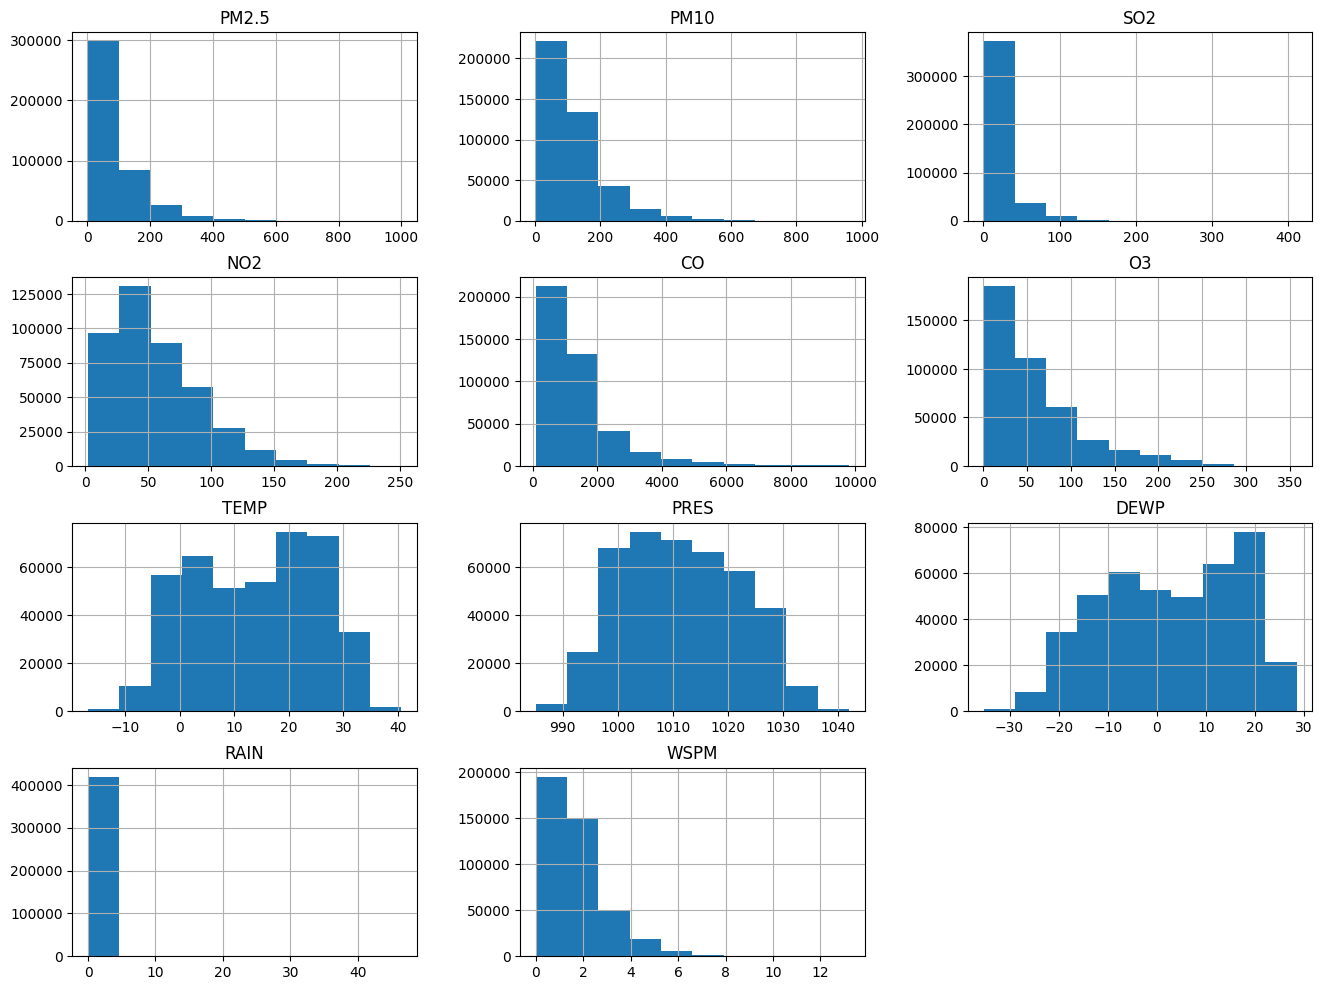

In [ ]:
air_data[param].hist(figsize=(16, 12))
plt.show()

In [ ]:
Industrials = ['SO2', 'O3']
vehicles = ['PM2.5', 'PM10', 'CO', 'NO2']

air_data.insert(loc = 11, column = 'Industrials', value = air_data[Industrials].sum(axis=1))
air_data.insert(loc = 12, column = 'Vehicles', value = air_data[vehicles].sum(axis=1))

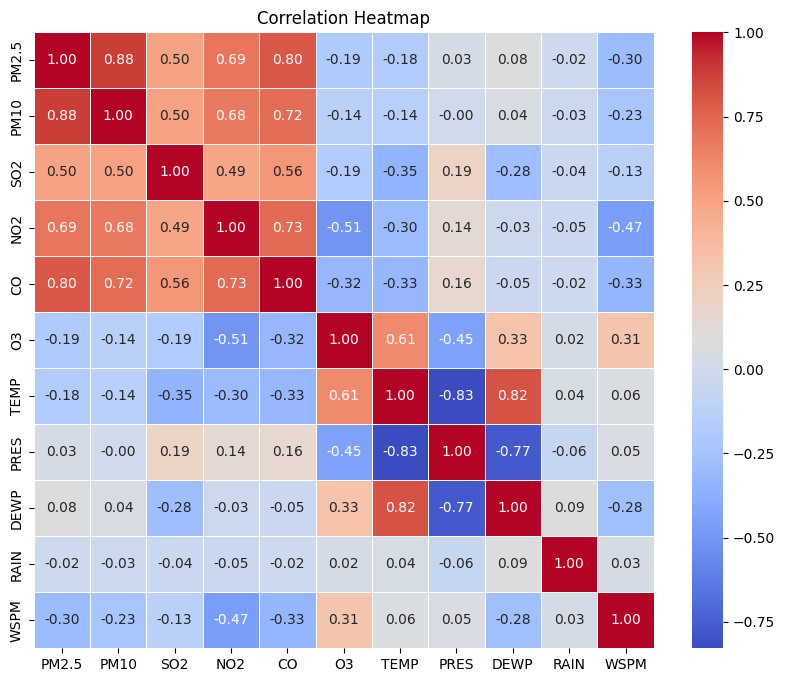

In [ ]:
corr_matrix = air_data[param].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
- Parameter hujan dan kecepatan arah angin tidak memiliki korelasi dengan Suhu dan tekanan atmosfir
- Korelasi matrix menunjukkan bahwa parameter polusi kendaraan (PM2.5, PM10, NO2, CO) dan SO2 memiliki korelasi positif sedangkan parameter O3 memiliki korelasi yang negatif.
- Parameter polusi (PM2.5, PM10, SO2, NO2, CO, dan O3) memiliki sebaran data yang Left-Skewed

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkat polusi kendaraan dari tahun 2013 hingga 2017 dari semua stasiun?

<ipython-input-29-8a65ba2fcd25>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  air_data_series = air_data[['datetime', 'Vehicles']].set_index('datetime').resample('M').mean()


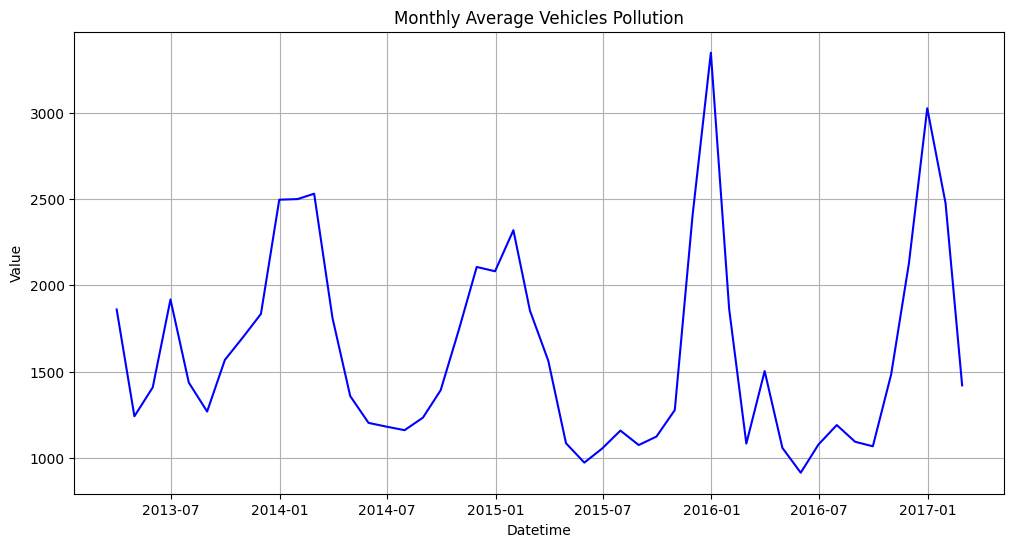

In [ ]:
air_data_series = air_data[['datetime', 'Vehicles']].set_index('datetime').resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(air_data_series.index, air_data_series['Vehicles'], color='blue')
plt.title('Monthly Average Vehicles Pollution')
plt.ylabel('Value')
plt.xlabel('Datetime')
plt.grid(True)
plt.show()

**Insight:**

Pada setiap menjelang awal/akhir tahun (musim dingin) terjadi peningkatan polusi kendaraan dimana puncaknya pada tahun 2016


### Pertanyaan 2: Apa yang paling mempengaruhi kualitas udara dalam rentang waktu tersebut?

In [ ]:
pollution = air_data.groupby(by = param).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})

pollution = pollution.mean().sort_values(ascending = True)

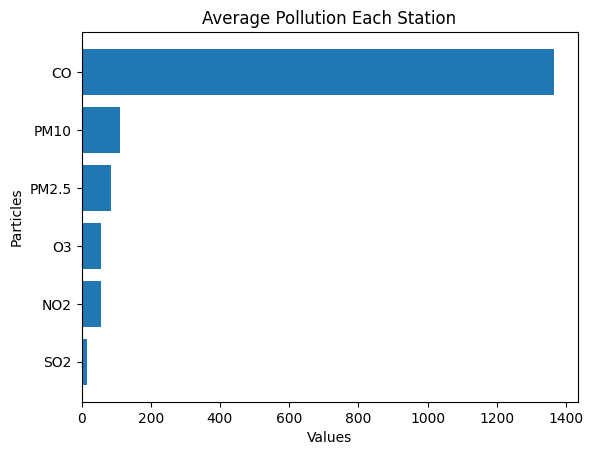

In [ ]:
plt.barh(pollution.index, pollution.values)
plt.title(label="Average Pollution Each Station")
plt.xlabel("Values")
plt.ylabel("Particles")
plt.show()

**Insight:**

Partikel yang paling mempengaruhi kualitas udara adalah CO diikuti PM10 dan PM2.5


## Analisis Lanjutan (Opsional)

### Geospacial Analysis

In [ ]:
station_to_code = {
    'Aotizhongxin': '001',
    'Changping': '002',
    'Dingling': '003',
    'Dongsi': '004',
    'Guanyuan': '005',
    'Gucheng': '006',
    'Huairou': '007',
    'Nongzhanguan': '008',
    'Shunyi': '009',
    'Tiantan': '010',
    'Wanliu': '011',
    'Wanshouxigong': '012',
}

air_data['station_id'] = air_data['station'].map(station_to_code)
print(air_data[['station', 'station_id']].tail())

             station station_id
35059  Wanshouxigong        012
35060  Wanshouxigong        012
35061  Wanshouxigong        012
35062  Wanshouxigong        012
35063  Wanshouxigong        012


In [ ]:
def generated_base_map():
  base_map = folium.Map(location=[40.286, 116.170], zoom_start=10)
  return base_map

In [ ]:
air_data['datetime'] = pd.to_datetime(air_data['datetime'])
air_data.set_index('datetime', inplace=True)

monthly_data = air_data.resample('ME').agg({'CO': 'mean', 'SO2': 'mean'})
monthly_data['latitude'] = air_data.groupby('station_id')['latitude'].first()
monthly_data['longitude'] = air_data.groupby('station_id')['longitude'].first()
monthly_data['year'] = monthly_data.index.year
monthly_data['month'] = monthly_data.index.month

In [ ]:
stations = pd.DataFrame({
    'station_id': list(station_to_code.values()),
    'station_name': list(station_to_code.keys()),
    'latitude': [coord[0] for coord in coordinates],
    'longitude': [coord[1] for coord in coordinates]
})

m = generated_base_map()

for _, station in stations.iterrows():
    folium.Marker(
        location=[station['latitude'], station['longitude']],
        popup=f"Station: {station['station_name']} CO: {monthly_data['CO'].mean():.2f}µg/Nm³<br>SO2: {monthly_data['SO2'].mean():.2f}µg/Nm³<br>",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Menampilkan peta
m

## Conclusion

- Berdasarkan grafik polusi dalam rentang tahun 2013 hingga 2017, diperlihatkan bahwa tingkat polusi kendaraan mulai meningkat saat akan memasuki akhir/awal tahun pada musim dingin dan mulai turun saat dipertengahan tahun pada saat musim panas
- Ditemukan bahwa partikel polusi yang sangat mempengaruhi kualitas udara yaitu karbon monoksida (CO) yang diikuti oleh PM2.5 dan PM10

In [ ]:
air_data.to_csv('air_data.csv', index=False)